<a href="https://colab.research.google.com/github/beatrizmontenegro07/Atividade3-CalculoNumerico/blob/main/Atividade3_CalculoNumerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚Bibliotecas

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# ✏️ Implementação do Método de Euler

In [ ]:
def metodo_euler(function, x_0, y_0, h, x_n):
  """
  Retorna os pontos (x, y) após a aplicação do método de euler

  Parâmetros:
  function: A função f(x, y)
  x_0 (float): O valor inicial de x
  y_0 (float): O valor inicial de y
  h (float): Valor de incremento
  x_n (float): Valor para calcular a aproximação em y(x_n)

  Retorna:
  tuple: Uma tupla que contém dois vetores:
            - valores_x: valores dos pontos x_i
            - valores_y: valores dos pontos y_i
  """
  valores_x = np.arange(x_0, x_n+h, h) #valores x_0 até x_n com incremento de valor h
  valores_y = [y_0]
  n = len(valores_x)

  for i in range(0, n-1):
    k = function(valores_x[i], valores_y[i])
    y = valores_y[i] + k*h #Calculo do y_i+1
    valores_y.append(y)
  return valores_x, valores_y

# ✏️ Implementação do Método de Runge-Kutta Ordem 3



In [ ]:
def metodo_runge3(function, x_0, y_0, h, x_n):
  """
  Retorna os pontos (x, y) após a aplicação do método de Runge-Hutta de terceira ordem

  Parâmetros:
  function: A função f(x, y)
  x_0 (float): O valor inicial de x
  y_0 (float): O valor inicial de y
  h (float): Valor de incremento
  x_n (float): Valor para calcular a aproximação em y(x_n)

  Retorna:
  tuple: Uma tupla que contém dois vetores:
          - valores_x: valores dos pontos x_i
          - valores_y: valores dos pontos y_i
  """
  valores_x = np.arange(x_0, x_n + h, h) #valores x_0 até x_n com incremento de valor h
  valores_y = [y_0]
  n = len(valores_x)

  for i in range(0, n-1):
    k_1 = function(valores_x[i], valores_y[i])
    k_2 = function(valores_x[i] + h/2, valores_y[i] + (k_1*h) / 2)
    k_3 = function(valores_x[i] + h, valores_y[i] - k_1*h + 2*k_2*h)
    y = valores_y[i] + (k_1 + 4*k_2 + k_3)*h/6 #Calculo do y_i+1
    valores_y.append(y)
  return valores_x, valores_y

# ✏️ Implementação do Método de Runge-Kutta Ordem 4


In [ ]:
def metodo_runge4(function, x_0, y_0, h, x_n):
    """
    Retorna os pontos (x, y) após a aplicação do método de Runge-Kutta de quarta ordem

    Parâmetros:
    function: A função f(x, y)
    x_0 (float): O valor inicial de x
    y_0 (float): O valor inicial de y
    h (float): Valor de incremento
    x_n (float): Valor para calcular a aproximação em y(x_n)

    Retorna:
    tuple: Uma tupla que contém dois vetores:
            - valores_x: valores dos pontos x_i
            - valores_y: valores dos pontos y_i
    """
    valores_x = np.arange(x_0, x_n + h, h)  # valores de x_0 até x_n com incremento de valor h
    valores_y = [y_0]
    n = len(valores_x)

    for i in range(0, n-1):
        k_1 = h * function(valores_x[i], valores_y[i])
        k_2 = h * function(valores_x[i] + h/2, valores_y[i] + k_1/2)
        k_3 = h * function(valores_x[i] + h/2, valores_y[i] + k_2/2)
        k_4 = h * function(valores_x[i] + h, valores_y[i] + k_3)

        y = valores_y[i] + (k_1 + 2*k_2 + 2*k_3 + k_4)/6  # Cálculo do y_i+1
        valores_y.append(y)

    return valores_x, valores_y

# 📑 QUESTÃO 1

Usando os métodos de Euler e Runge-Kutta de 3ª ordem com $h=0,2$ calcule $y(1)$ sabendo que $y (x)$ é solução de  
${2x + yy' = y²}$  

${y(0) = 1}$
  

Sabendo que a solução exata do PVI acima é ${y= }\sqrt{2x+1}$, calcule para os dois métodos o erro absoluto cometido na aproximação de $y(1)$.


In [ ]:
#definindo a função f(x, y) com base no problema dado, a partir do isolamento de y'
def f1(x, y):
  return (pow(y, 2) - 2*x)/y



#solução exata dada na questão
def solucao_exata(x):
  return math.sqrt(2*x + 1)

### Valores de entrada
$x_0$ -> Valor inicial de x  
$y_0$ -> Valor inicial de y  
$x_n$ -> Valor de x_n que deseja encontrar de y(x_n)  
$h$ -> Valor a ser incrementado

In [ ]:
#Valores definidos com base no enunciado da questão

x_0 = 0
y_0 = 1
h = 0.2
x_n = 1

### Aplicando o Método de Euler

Valor de y(1) é aproximadamente 1.8269481804182377
Valor de y(1) na solução exata é 1.7320508075688772
Erro absoluto = 0.0948973728493605


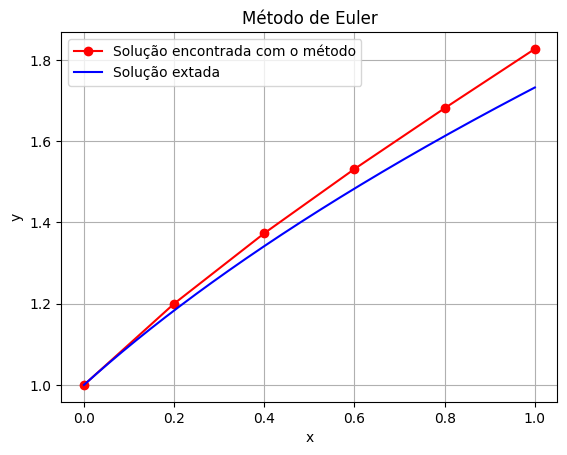

In [ ]:

pontos_x, pontos_y = metodo_euler(f1, x_0, y_0, h, x_n)

pontos_x_solucao_exata = np.linspace(x_0, x_n, 400)
pontos_y_solucao_exata = [solucao_exata(x) for x in pontos_x_solucao_exata]

print(f"Valor de y({x_n}) é aproximadamente {pontos_y[-1]}")
print(f"Valor de y({x_n}) na solução exata é {solucao_exata(x_n)}")
print(f"Erro absoluto = {abs(solucao_exata(x_n) - pontos_y[-1])}")


plt.plot(pontos_x, pontos_y, label='Solução encontrada com o método',marker='o', color='r')
plt.plot(pontos_x_solucao_exata, pontos_y_solucao_exata,label='Solução extada', color='b')
plt.title('Método de Euler')
plt.xlabel('x')
plt.ylabel('y')

# Exibindo o gráfico
plt.legend()
plt.grid(True)
plt.show()


### Aplicando o Método de Runge-Kutta de 3ª ordem

Valor de y(1) é aproximadamente 1.7324718336701308
Valor de y(1) na solução exata é 1.7320508075688772
Erro absoluto = 0.0004210261012536076


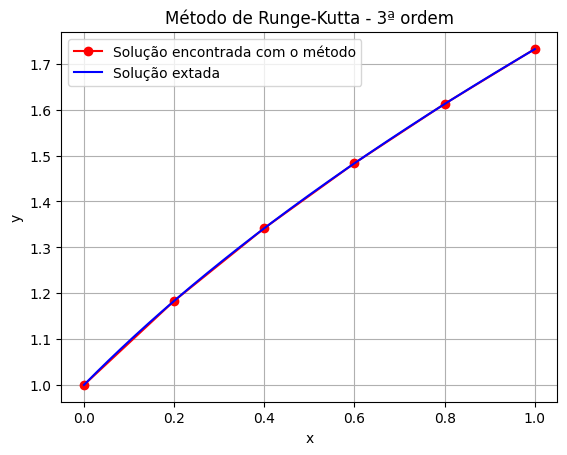

In [ ]:
pontos_x, pontos_y = metodo_runge3(f1, x_0, y_0, h, x_n)

pontos_x_solucao_exata = np.linspace(x_0, x_n, 400)
pontos_y_solucao_exata = [solucao_exata(x) for x in pontos_x_solucao_exata]

print(f"Valor de y({x_n}) é aproximadamente {pontos_y[-1]}")
print(f"Valor de y({x_n}) na solução exata é {solucao_exata(x_n)}")
print(f"Erro absoluto = {abs(solucao_exata(x_n) - pontos_y[-1])}")


plt.plot(pontos_x, pontos_y, label='Solução encontrada com o método',marker='o', color='r')
plt.plot(pontos_x_solucao_exata, pontos_y_solucao_exata,label='Solução extada', color='b')
plt.title('Método de Runge-Kutta - 3ª ordem')
plt.xlabel('x')
plt.ylabel('y')

# Exibindo o gráfico
plt.legend()
plt.grid(True)
plt.show()

# 📑 QUESTÃO 2

Um projetil de massa $m = 0.11 kg$, lançado verticalmente para
acima com velocidade inicial $v(0)=8 m/s$, é detido pela força
gravitacional $F_g = mg$ e a resistência do ar $F_r = -kv|v|$ onde $g = -
9.8 m/s²$ e $k = 0.002 kg/m$. A equação¸ diferencial para a
velocidade é dada por  
## $mv' = mg - kv|v|$  


## QUESTÃO 2 - A

(a) Encontre a velocidade depois de 0.1s, 0.2s, ..., 1s

Primeiramente, vamos adaptar nossa função para isolar o valor de v' ou v(t)

In [ ]:
#Implementação da Equação dada na questão 2
def f2(t, v):
    #v é a velocidade v(t)
    m = 0.11 # m, grav e k são constantes
    grav = -9.8
    k = 0.002
    valorV = (m * grav - k * v * abs(v)) / m #Formula isolando v(t)
    return valorV

Usando o Método de Euler, temos:

In [ ]:
x_0, y_0 = 0, 8
#x_0 = float(input("x_0 = "))
#y_0 = float(input("y_0 = "))
eulerX, eulerY = metodo_euler(f2, x_0, y_0, 0.1, 1)

print("Os valores de X sao:")
for valor in eulerX:
  print(f"{valor:.2f} ", end=" ")
print("\n")
print("Os valores de Y sao:")
for valor in eulerY:
  print(f"{valor:.4f} ", end=" ")
print()

Os valores de X sao:
0.00  0.10  0.20  0.30  0.40  0.50  0.60  0.70  0.80  0.90  1.00  

Os valores de Y sao:
8.0000  6.9036  5.8370  4.7950  3.7732  2.7673  1.7734  0.7877  -0.1934  -1.1734  -2.1509  


Usando o Método de Runge-Kutta, temos:


In [ ]:
x_0, y_0 = 0, 8
#x_0 = float(input("x_0 = "))
#y_0 = float(input("y_0 = "))
valoresX, valoresY = metodo_runge3(f2, x_0, y_0, 0.1, 1)

print("Os valores de X sao:")
for valor in valoresX:
  print(f"{valor:.2f} ", end=" ")
print("\n")
print("Os valores de Y sao:")
for valor in valoresY:
  print(f"{valor:.4f} ", end=" ")
print()

Os valores de X sao:
0.00  0.10  0.20  0.30  0.40  0.50  0.60  0.70  0.80  0.90  1.00  

Os valores de Y sao:
8.0000  6.9187  5.8643  4.8322  3.8181  2.8179  1.8279  0.8446  -0.1358  -1.1149  -2.0901  


## QUESTÃO 2 - b

(b) Numericamente, encontre o tempo no qual o projetil começa a
cair.

**Resposta**: para encontrar o tempo no qual o projetil começa a cair, vamos utilizar os métodos de Euler e de Runge-Kutta com 3º Ordem e observar quando a velocidade passa a ser zero, e a partir disso, decair para valores negativos.

In [ ]:
x_0, y_0 = 0, 8

vxEuler, vyEuler = metodo_euler(f2, x_0, y_0, 0.1, 1)
tam = len(vyEuler)

print("No metodo de euller, temos:")
for i in range(0, tam):
  print(f"Para X = {vxEuler[i]:.2f} temos Y = {vyEuler[i]:4f}")

No metodo de euller, temos:
Para X = 0.00 temos Y = 8.000000
Para X = 0.10 temos Y = 6.903636
Para X = 0.20 temos Y = 5.836981
Para X = 0.30 temos Y = 4.795035
Para X = 0.40 temos Y = 3.773231
Para X = 0.50 temos Y = 2.767345
Para X = 0.60 temos Y = 1.773421
Para X = 0.70 temos Y = 0.787703
Para X = 0.80 temos Y = -0.193425
Para X = 0.90 temos Y = -1.173357
Para X = 1.00 temos Y = -2.150854


Pelo visto entre 0.7 e 0.8 segundos, o valor de y chegou a zero, vamos analisar com mais detalhes entre esse intervalo.

In [ ]:
x_0, y_0 = 0.7, 0.7877 #Novos valores de x0 e y0 baseados no item a)

vxEuler, vyEuler = metodo_euler(f2, x_0, y_0, 0.01, 0.8)
tam = len(vyEuler)

print("No metodo de euller, temos:")
for i in range(0, tam-1):
  print(f"Para X = {vxEuler[i]:.2f} temos Y = {vyEuler[i]:4f}")

No metodo de euller, temos:
Para X = 0.70 temos Y = 0.787700
Para X = 0.71 temos Y = 0.689587
Para X = 0.72 temos Y = 0.591501
Para X = 0.73 temos Y = 0.493437
Para X = 0.74 temos Y = 0.395393
Para X = 0.75 temos Y = 0.297364
Para X = 0.76 temos Y = 0.199348
Para X = 0.77 temos Y = 0.101341
Para X = 0.78 temos Y = 0.003339
Para X = 0.79 temos Y = -0.094661
Para X = 0.80 temos Y = -0.192659


Então, pelo método Euler, foi entre 0.78s e 0.79 segundos que v(t) começou a decair, dando o passo de 0.01s. Agora, nesse mesmo contexto, vamos analisar como a velocidade se comporta com o método de Runge-Kutta

In [ ]:
x_0, y_0 = 0.7, 0.8446 #Novos valores de x0 e y0 baseados no item a)

vxRuge, vyRuge = metodo_runge3(f2, x_0, y_0, 0.01, 0.8)
tam = len(vyRuge)

print("No metodo de Runge-Kutta, temos:")
for i in range(0, tam-1):
  print(f"Para X = {vxRuge[i]:.2f} temos Y = {vyRuge[i]:4f}")

No metodo de Runge-Kutta, temos:
Para X = 0.70 temos Y = 0.844600
Para X = 0.71 temos Y = 0.746485
Para X = 0.72 temos Y = 0.648396
Para X = 0.73 temos Y = 0.550331
Para X = 0.74 temos Y = 0.452285
Para X = 0.75 temos Y = 0.354255
Para X = 0.76 temos Y = 0.256238
Para X = 0.77 temos Y = 0.158230
Para X = 0.78 temos Y = 0.060228
Para X = 0.79 temos Y = -0.037772
Para X = 0.80 temos Y = -0.135771


Então, chegamos a conclusão que o método de Runge-Kutta também indica que o projétil **m** também começa a cair entre 0.78s e 0.79s, pois sua velocidade alcançou valor negativo.

## QUESTÃO 2 - Gráfico

Por fim, vamos observar o comportamento da velocidade do projétil através de seu gráfico, que demonstra os valores da velocidade **v(t)** ao longo da variação do tempo **t**. Tanto pelo método de Euler, quanto pelo método de Runge-Kutta.

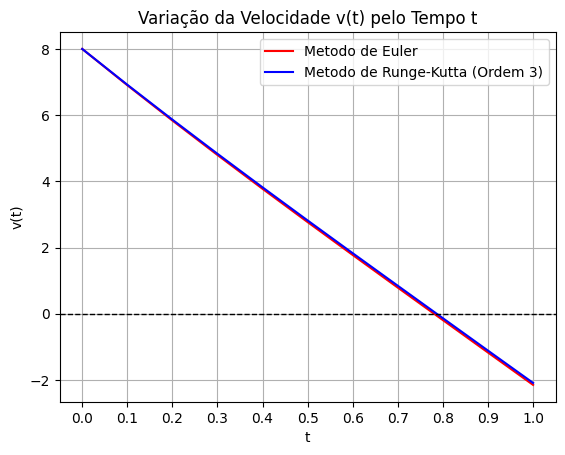

In [ ]:
x_0, y_0 = 0, 8
eulerX, eulerY = metodo_euler(f2, x_0, y_0, 0.1, 1)
rungeX, rungeY = metodo_runge3(f2, x_0, y_0, 0.1, 1)

plt.plot(eulerX, eulerY, label="Metodo de Euler", color="r")
plt.plot(rungeX, rungeY, label="Metodo de Runge-Kutta (Ordem 3)", color="b")
plt.title("Variação da Velocidade v(t) pelo Tempo t")
plt.xlabel("t")
plt.ylabel("v(t)")

#detalhando o eixo x (tempo)
plt.xticks(np.arange(0, 1.1, 0.1)) #definindo intervalo para eixo x
plt.axhline(0, color='black', linewidth=1, linestyle='--') #destando o eixo x

# Exibindo o gráfico
plt.legend()
plt.grid(True)
plt.show()


Assim como esperado, o gráfico da equação dada na questão corrobora com a análise númerica do item b). Quando o tempo chega muito próximo de 0.8 segundos, sua velocidade começa a ter valores negativos, consequentemente, o projétil começaria a cair.

# 📑 QUESTÃO 3

Seja $P(t)$ o número de indivíduos de uma certa população
medido em anos. Se a taxa de nascimentos é constante $b$ e a taxa
de mortalidade $d$ é proporcional ao tamanho da população, então
o crescimento da população é dado pela equação logística    
  
$\frac{dP(t)}{dt} = bP(t) - k(P(t))²$  

Onde $d=kP(t)$. Suponha que $P(0) = 50976$, $b = 2.9 \times 10^{-2}$ e $k =
1.4 \times 10^{-7}$.  
 Encontre a população estimada depois de 5 anos
utilizando Runge-Kutta de ordem 4.

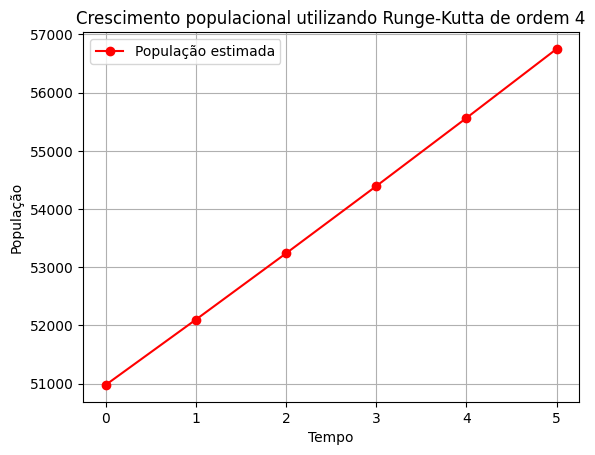

População estimada após 5 anos: 56751.036760880226


In [ ]:
def funcao_populacao(t, P):
    b = 2.9e-2
    k = 1.4e-7
    return b * P - k * P**2


# Parâmetros do problema da questão
P_0 = 50976
h = 1
t_0 = 0
t_n = 5


valores_t, valores_P = metodo_runge4(funcao_populacao, t_0, P_0, h, t_n)

plt.plot(valores_t, valores_P, label='População estimada', marker='o', color='r')
plt.title("Crescimento populacional utilizando Runge-Kutta de ordem 4")
plt.xlabel("Tempo")
plt.ylabel("População")
plt.grid(True)
plt.legend()
plt.show()
print(f"População estimada após {t_n} anos: {valores_P[-1]}")